<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width="600"/>

# Palmer Penguins 

Este conjunto de datos contiene información sobre tres especies de pingüinos que habitan en las Islas Palmer, en la Península Antártica. Las especies incluidas son Adelie, Chinstrap y Gentoo.

# Librerías

In [14]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy
 
# mis cosas
from Prof.utils import create_summary_table, descriptive_statistics, plot_variable_distribution, grafico_combinaciones

# Carga de Datos

In [ ]:
penguins = pd.read_csv('data/raw/penguins_pro.csv')
penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Primera Exploración

In [4]:
df = penguins.copy()

In [5]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:
df.tail()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,344,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [7]:
df.shape

(344, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [9]:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [10]:
df.describe(include='all')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [11]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
['male' 'female' nan]


## COMO LO HARÍA DANI

In [12]:
# 1.1 Inspección Inicial

# Tamaño y estructura de los datos
print("=== TAMAÑO Y ESTRUCTURA DE LOS DATOS ===")
print(f"Número total de registros: {penguins.shape[0]}")
print(f"Número de columnas: {penguins.shape[1]}")
print(f"Uso de memoria: {penguins.memory_usage().sum() / 1024:.2f} KB")
print("\n")

# Tipos de datos y nombres de columnas
print("=== TIPOS DE DATOS Y NOMBRES DE COLUMNAS ===")
print(penguins.dtypes)
print("\n")
print("Información detallada del DataFrame:")
print(penguins.info())
print("\n")

# Identificación de problemas iniciales
print("=== IDENTIFICACIÓN DE PROBLEMAS INICIALES ===")
print(f"Número de filas duplicadas: {penguins.duplicated().sum()}")
print("\nValores nulos por columna:")
print(penguins.isnull().sum())

# Mostrar las primeras filas para verificar la estructura
print("\nPrimeras filas del dataset:")
print(penguins.head())

=== TAMAÑO Y ESTRUCTURA DE LOS DATOS ===
Número total de registros: 344
Número de columnas: 9
Uso de memoria: 24.32 KB


=== TIPOS DE DATOS Y NOMBRES DE COLUMNAS ===
rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-

### Conclusiones

Se puede observar que los datos están compuesto por 344 filas y 9 columnas de las cuales `rowid`carece de importancia ya que es un indice. 

las otras columnas son:

|Variable|Descripción|
|---|---|
|Especie (species)| Adelie, Chinstrap, Gentoo.|
|Isla (island)| Biscoe, Dream, Torgersen.|
|Longitud del pico (bill_length_mm)| medida en milímetros.|
|Profundidad del pico (bill_depth_mm)| medida en milímetros.|
|Longitud de la aleta (flipper_length_mm)| medida en milímetros.|
|Masa corporal (body_mass_g)| medida en gramos.|
|Género (sex)| Macho o Hembra.|
|Año (year)| Año en que se recolectaron los datos.|

## Análisis Exploratorio de Datos (EDA)

### Análisis Univariado

In [15]:
create_summary_table(df)

,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
rowid,int64,344,100.000000,0,0.000000,Índice Numérico
species,object,3,0.872093,0,0.000000,Categorica Nominal
island,object,3,0.872093,0,0.000000,Categorica Nominal
bill_length_mm,float64,164,47.674419,2,0.581395,Numerica Continua
bill_depth_mm,float64,80,23.255814,2,0.581395,Numerica Continua
flipper_length_mm,float64,55,15.988372,2,0.581395,Numerica Continua
body_mass_g,float64,94,27.325581,2,0.581395,Numerica Continua
sex,object,2,0.581395,11,3.197674,Binaria
year,int64,3,0.872093,0,0.000000,Numerica Discreta


El DataFrame consta de 3 columnas del tipo object, 4 del tipo float y una de int, las tipo object son dos categóricas nominales y una binaria (sex), las float son continuas y la int es discreta, la columna sex es la que presenta la mayor cantidad de missing con un 3.20% seguidas de bill_length_mm, bill_depth_mm, flipper_length_mm y body_mass_g con un 0.58%

In [16]:
numericas, categoricas = descriptive_statistics(df)

In [17]:
numericas

,count,mean,median,mode,std,min,25%,50%,75%,max,iqr,range,variance,std_dev,skewness,kurtosis,missing,missing_percent
rowid,344.0,172.500000,172.50,1.0,99.448479,1.0,86.750,172.50,258.25,344.0,171.500,343.0,9890.000000,99.448479,0.000000,-1.200000,0,0.000000
bill_length_mm,342.0,43.921930,44.45,41.1,5.459584,32.1,39.225,44.45,48.50,59.6,9.275,27.5,29.807054,5.459584,0.053118,-0.876027,2,0.581395
bill_depth_mm,342.0,17.151170,17.30,17.0,1.974793,13.1,15.600,17.30,18.70,21.5,3.100,8.4,3.899808,1.974793,-0.143465,-0.906866,2,0.581395
flipper_length_mm,342.0,200.915205,197.00,190.0,14.061714,172.0,190.000,197.00,213.00,231.0,23.000,59.0,197.731792,14.061714,0.345682,-0.984273,2,0.581395
body_mass_g,342.0,4201.754386,4050.00,3800.0,801.954536,2700.0,3550.000,4050.00,4750.00,6300.0,1200.000,3600.0,643131.077327,801.954536,0.470329,-0.719222,2,0.581395
year,344.0,2008.029070,2008.00,2009.0,0.818356,2007.0,2007.000,2008.00,2009.00,2009.0,2.000,2.0,0.669706,0.818356,-0.053728,-1.504937,0,0.000000


En las variables numéricas se puede observar que la masa corporal (`body_mass_g`) tiene una varianza muy elevada dando a entender que los pingüinos presentan tamaños muy distintos seguramente entre especies, también se observa que los años son desde el 2007 hasta el 2009, y que la media moda y mediana de cada una de las variables continuas menos `body_mass_g` tienen valores muy similares.

In [18]:
categoricas

,count,unique,top,freq,missing,missing_percent
species,344,3,Adelie,152,0,0.000000
island,344,3,Biscoe,168,0,0.000000
sex,333,2,male,168,11,3.197674


Las variables categóricas son representadas por las variables especies isla y sex de las cuales tanto isla como especies tienen una cardinalidad de 3 y podemos asumir a falta de comprobar que cada especie habita una isla en particular.

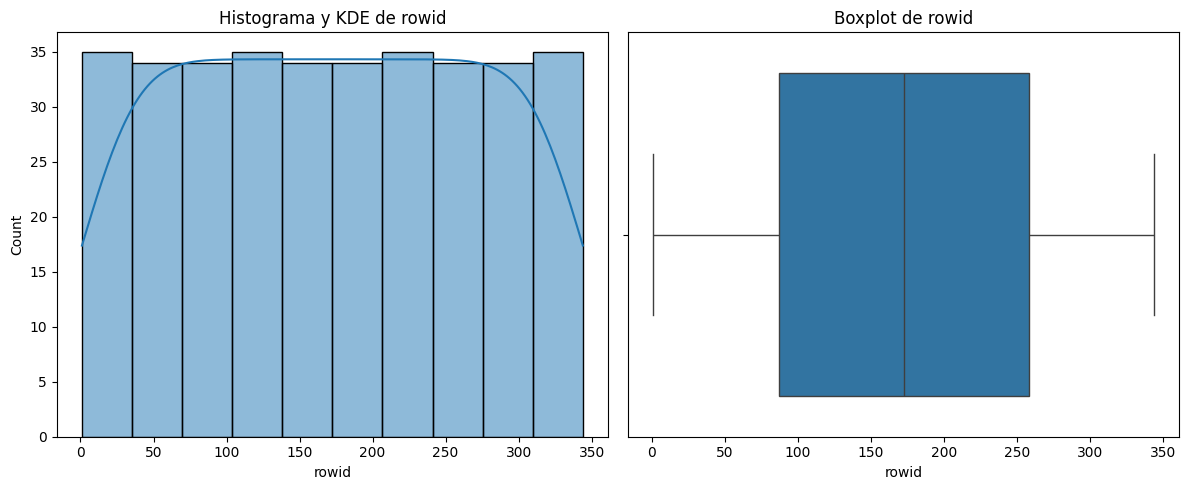

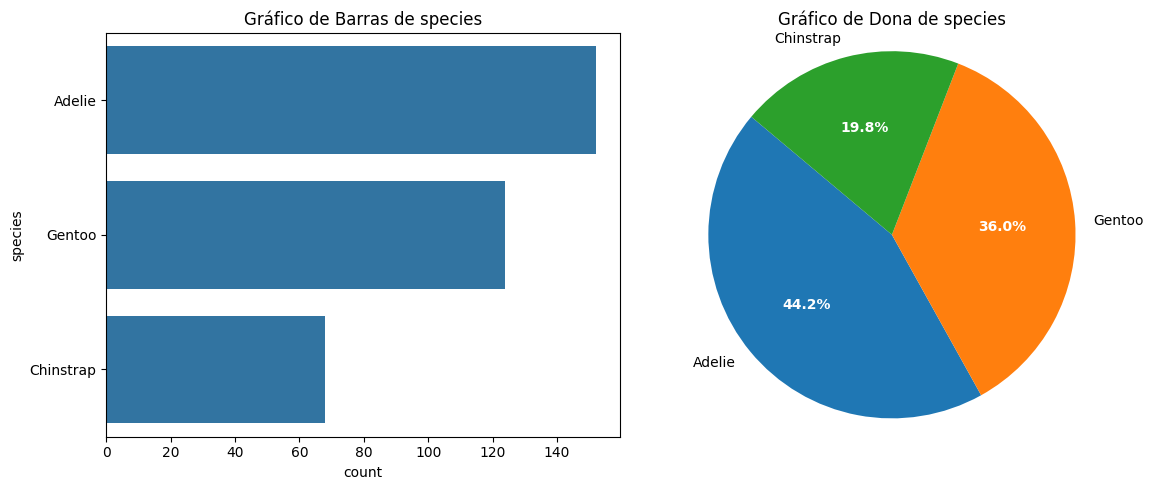

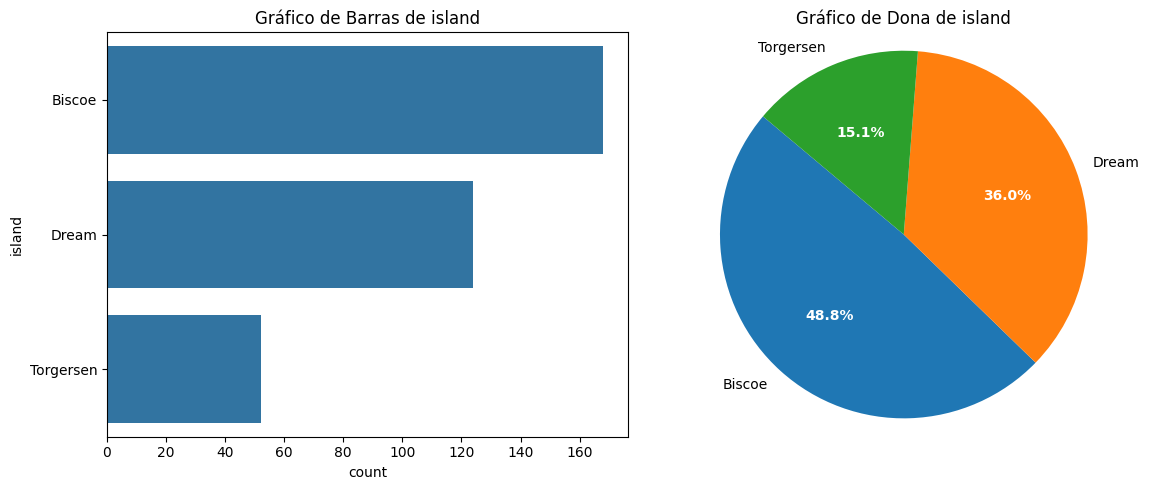

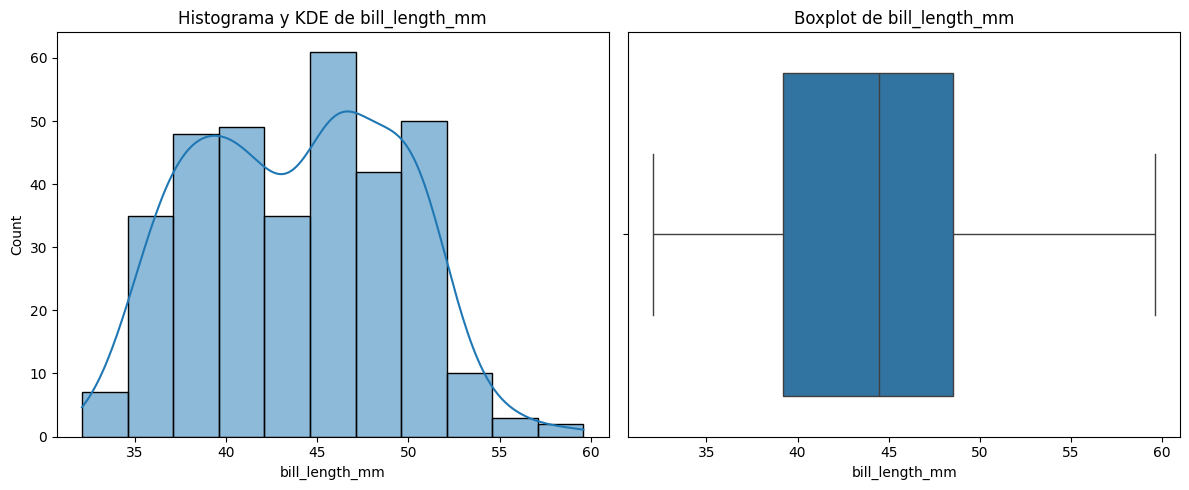

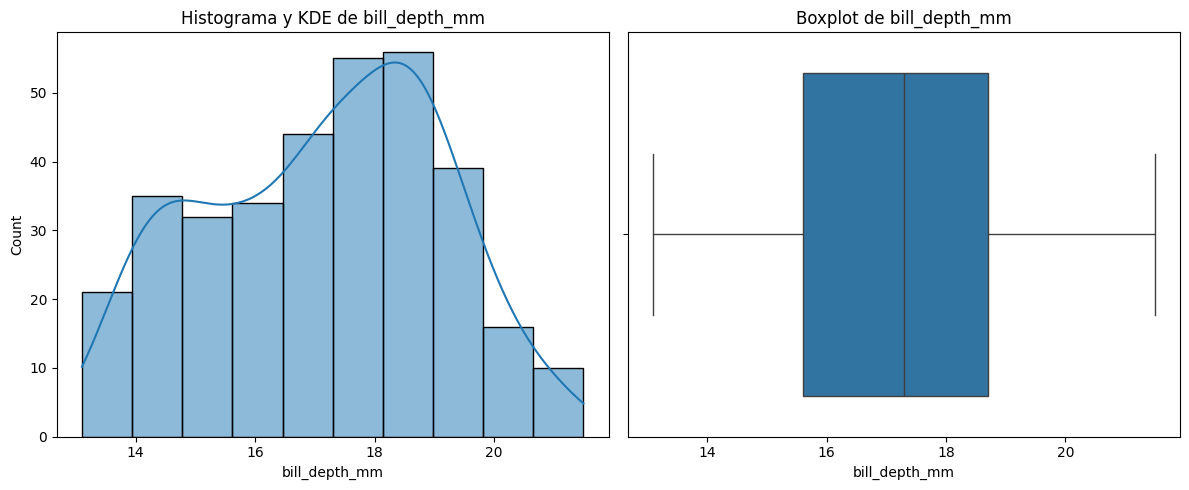

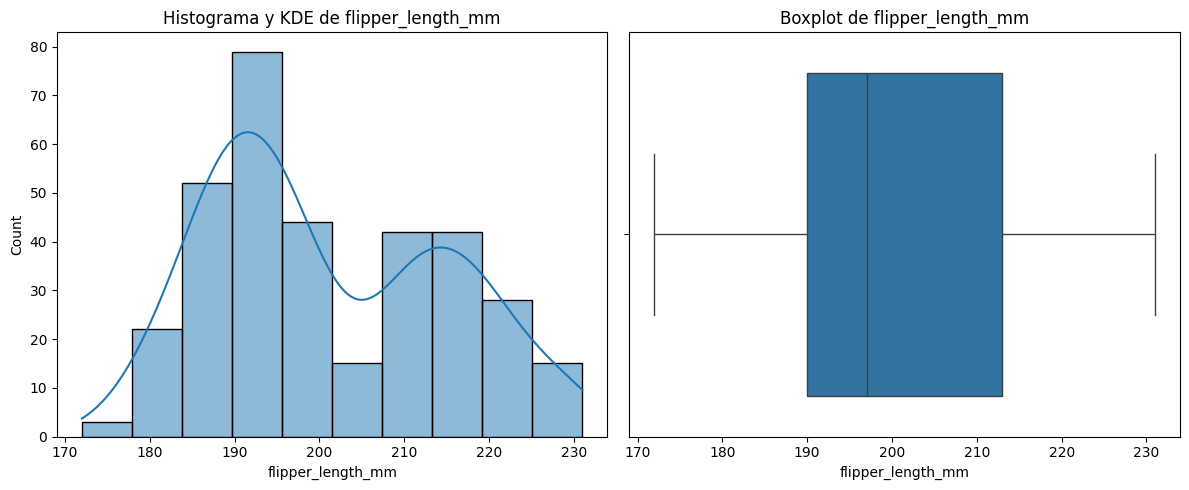

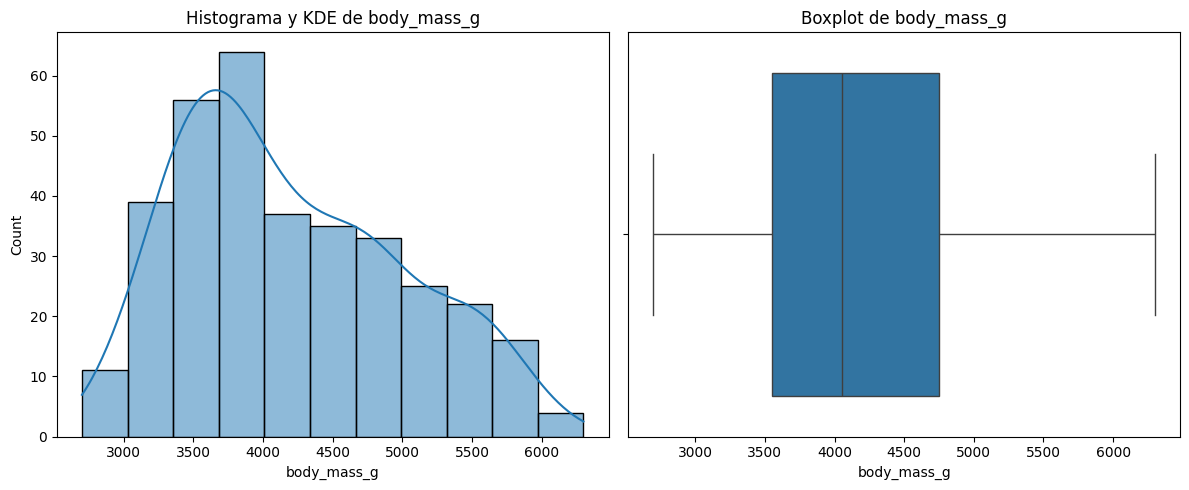

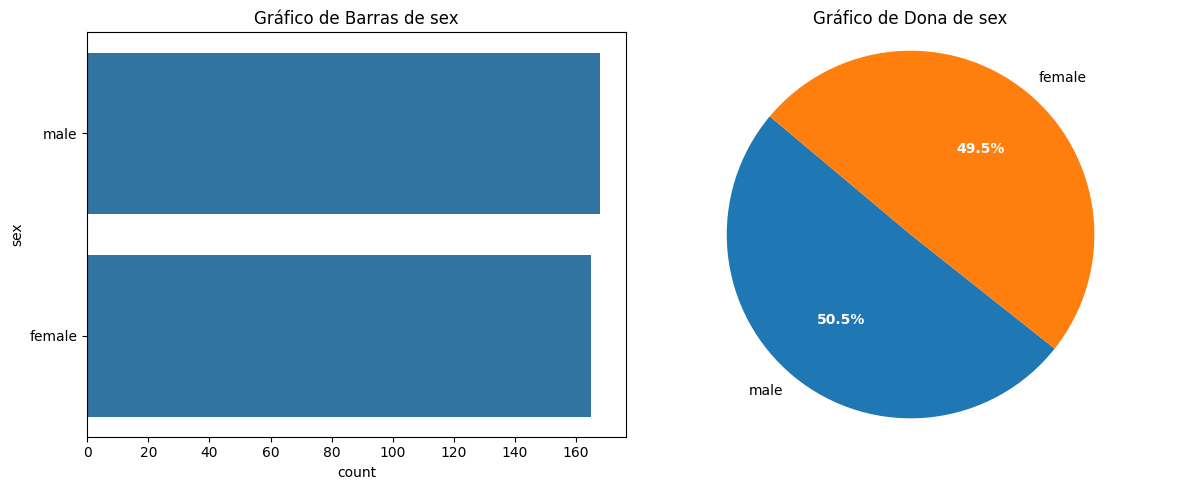

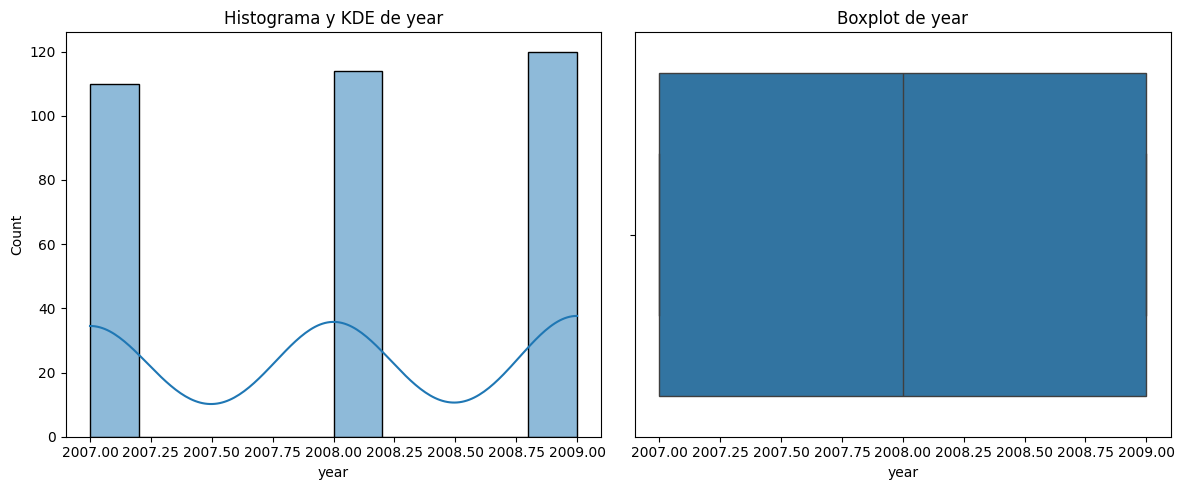

In [19]:
plot_variable_distribution(df)

In [20]:
df[df['sex'].isnull()]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,12,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,48,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,179,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,219,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,257,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,269,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


## COMO LO HARÍA DANI

In [27]:
numeric_cols = df.select_dtypes(exclude= 'object').columns

# Estadísticas descriptivas

# print("=== ESTADÍSTICAS DESCRIPTIVAS VARIABLES NUMÉRICAS ===")
# desc_stats = penguins[numeric_cols].describe()
# print(desc_stats)

# # Crear figura para histogramas y density plots
# fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(15, 4*len(numeric_cols)))
# fig.suptitle('Distribución de Variables Numéricas', y=1.02, size=16)

# for i, col in enumerate(numeric_cols):
#     # Histograma
#     sns.histplot(data=penguins, x=col, kde=True, ax=axes[i,0])
#     axes[i,0].set_title(f'Histograma de {col}')

#     # Box plot
#     sns.boxplot(data=penguins, y=col, ax=axes[i,1])
#     axes[i,1].set_title(f'Box Plot de {col}')

# plt.tight_layout()
# plt.show()

# # 2.1.2 Variables Categóricas
categorical_cols = penguins.select_dtypes(include=['object']).columns

# # Análisis de frecuencias
# print("\n=== ANÁLISIS DE FRECUENCIAS VARIABLES CATEGÓRICAS ===")
# for col in categorical_cols:
#     print(f"\nFrecuencias para {col}:")
#     freq_abs = penguins[col].value_counts()
#     freq_rel = penguins[col].value_counts(normalize=True)
#     freq_df = pd.DataFrame({
#         'Frecuencia Absoluta': freq_abs,
#         'Frecuencia Relativa (%)': freq_rel * 100
#     })
#     print(freq_df)

# # Visualización de variables categóricas
# fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))
# fig.suptitle('Distribución de Variables Categóricas', y=1.05, size=16)

# for i, col in enumerate(categorical_cols):
#     sns.countplot(data=penguins, y=col, ax=axes[i])
#     axes[i].set_title(f'Distribución de {col}')

# plt.tight_layout()
# plt.show()

# # 2.2.1 Relaciones entre variables numéricas
# # Matriz de correlación
# plt.figure(figsize=(10, 8))
# sns.heatmap(penguins[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
# plt.title('Matriz de Correlación - Variables Numéricas')
# plt.show()

# # Scatter plots
# sns.pairplot(penguins, hue='species')
# plt.show()

# # 2.2.2 y 2.2.3 Relaciones entre variables categóricas y numéricas
# fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(12, 5*len(numeric_cols)))
# fig.suptitle('Distribución de Variables Numéricas por Especie', y=1.02, size=16)

# for i, col in enumerate(numeric_cols):
#     sns.violinplot(data=penguins, x='species', y=col, ax=axes[i])
#     axes[i].set_title(f'{col} por Especie')

# plt.tight_layout()
# plt.show()

# 2.3 Tabla Resumen Detallada
def create_summary_table(df):
    summary = []

    for col in df.columns:
        col_data = {
            'Variable': col,
            'Tipo de Dato': df[col].dtype,
            'Tipo': 'Numérica' if np.issubdtype(df[col].dtype, np.number) else 'Categórica',
            'Cardinalidad': df[col].nunique(),
            'Valores Faltantes': df[col].isnull().sum(),
            '% Valores Faltantes': (df[col].isnull().sum() / len(df)) * 100
        }

        if np.issubdtype(df[col].dtype, np.number):
            col_data.update({
                'Media': df[col].mean(),
                'Mediana': df[col].median(),
                'Desv. Estándar': df[col].std(),
                'Asimetría': df[col].skew(),
                'Curtosis': df[col].kurtosis(),
                'Mínimo': df[col].min(),
                'Máximo': df[col].max()
            })

            # Test de normalidad
            if df[col].notnull().sum() > 3:  # Verificar que hay suficientes datos
                _, p_value = scipy.stats.normaltest(df[col].dropna())
                col_data['P-valor Normalidad'] = p_value

        summary.append(col_data)

    return pd.DataFrame(summary)

# Crear y mostrar tabla resumen
summary_table = create_summary_table(penguins)
print("\n=== TABLA RESUMEN DETALLADA ===")
print(summary_table)


=== TABLA RESUMEN DETALLADA ===
            Variable Tipo de Dato        Tipo  Cardinalidad  \
0              rowid        int64    Numérica           344   
1            species       object  Categórica             3   
2             island       object  Categórica             3   
3     bill_length_mm      float64    Numérica           164   
4      bill_depth_mm      float64    Numérica            80   
5  flipper_length_mm      float64    Numérica            55   
6        body_mass_g      float64    Numérica            94   
7                sex       object  Categórica             2   
8               year        int64    Numérica             3   

   Valores Faltantes  % Valores Faltantes        Media  Mediana  \
0                  0             0.000000   172.500000   172.50   
1                  0             0.000000          NaN      NaN   
2                  0             0.000000          NaN      NaN   
3                  2             0.581395    43.921930    44.45   
4

=== ANÁLISIS DE VALORES FALTANTES ===
                            Variable  Valores Faltantes  Porcentaje
sex                              sex                 11        3.20
body_mass_g              body_mass_g                  2        0.58
bill_depth_mm          bill_depth_mm                  2        0.58
flipper_length_mm  flipper_length_mm                  2        0.58
bill_length_mm        bill_length_mm                  2        0.58
rowid                          rowid                  0        0.00
island                        island                  0        0.00
species                      species                  0        0.00
year                            year                  0        0.00


<Figure size 1000x600 with 0 Axes>

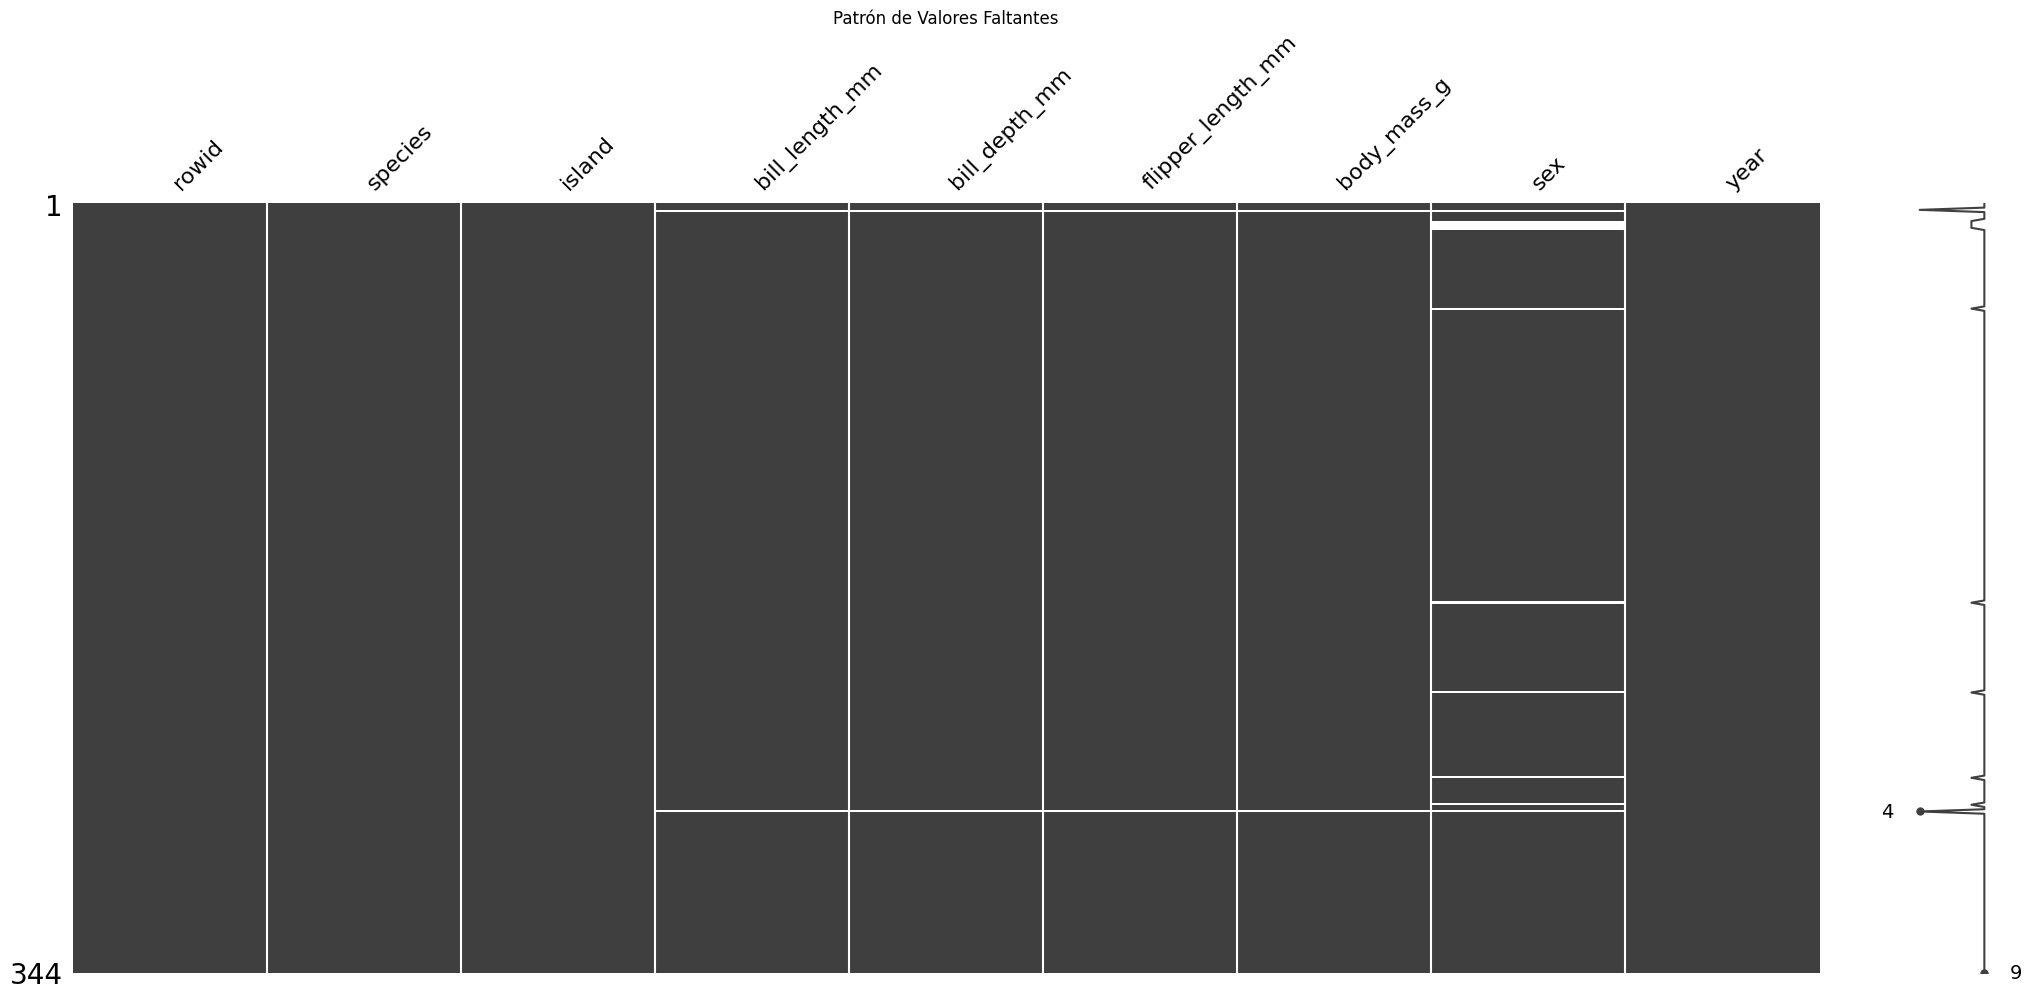

<Figure size 1000x600 with 0 Axes>

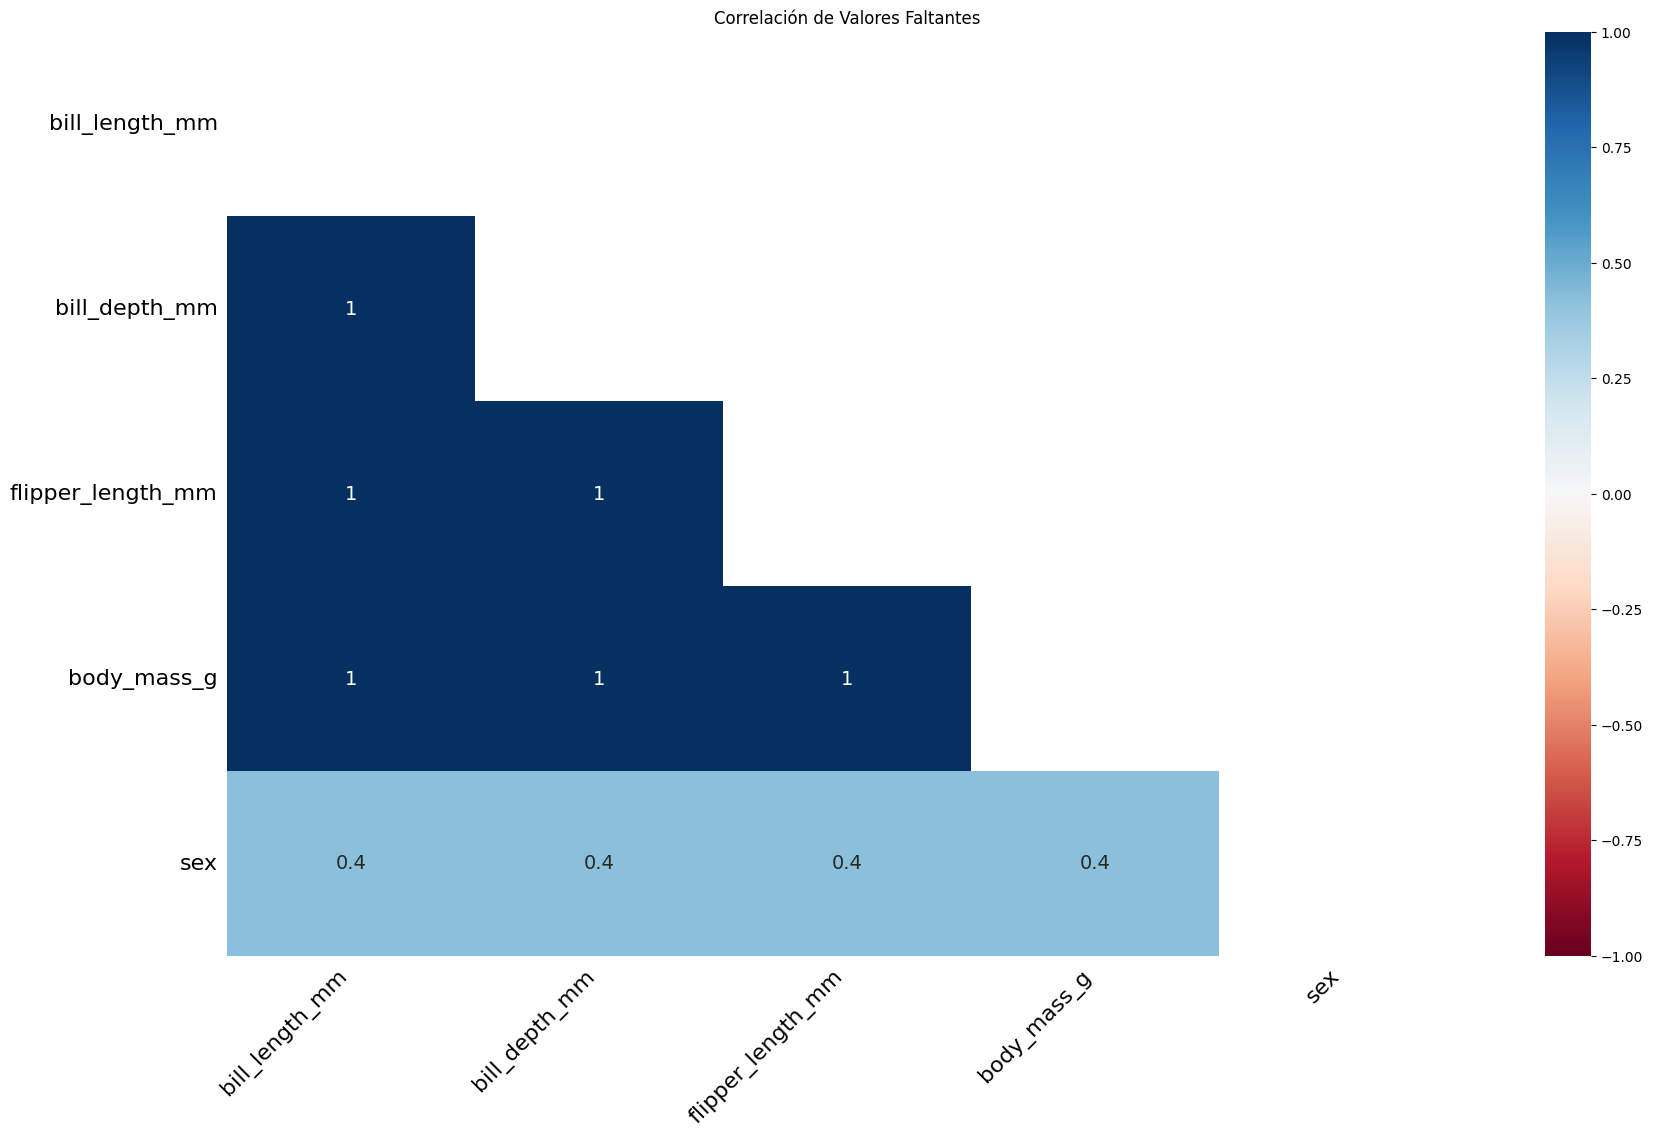

In [28]:
import missingno as msno

# 3.1 Análisis Detallado de Valores Faltantes

# Función para calcular el porcentaje de valores faltantes
def missing_values_analysis(df):
    missing = pd.DataFrame({
        'Variable': df.columns,
        'Valores Faltantes': df.isnull().sum(),
        'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
    })
    return missing.sort_values('Porcentaje', ascending=False)

print("=== ANÁLISIS DE VALORES FALTANTES ===")
print(missing_values_analysis(penguins))

# Visualización de patrones de valores faltantes
plt.figure(figsize=(10, 6))
msno.matrix(penguins)
plt.title('Patrón de Valores Faltantes')
plt.show()

plt.figure(figsize=(10, 6))
msno.heatmap(penguins)
plt.title('Correlación de Valores Faltantes')
plt.show()

# Separar variables numéricas y categóricas
numeric_cols = penguins.select_dtypes(include=[np.number]).columns
categorical_cols = penguins.select_dtypes(include=['object']).columns

# Crear copias para diferentes métodos de imputación
penguins_simple = penguins.copy()
penguins_knn = penguins.copy()
penguins_iterative = penguins.copy()

In [29]:
df1 = df.copy()
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


In [30]:
df_2 = df.copy()
df_2['bill_length_mm'] = df_2['bill_length_mm'].fillna(df_2['bill_length_mm'].mean())
df_2['bill_depth_mm'] = df_2['bill_depth_mm'].fillna(df_2['bill_depth_mm'].mean())
df_2['flipper_length_mm'] = df_2['flipper_length_mm'].fillna(df_2['flipper_length_mm'].median())
df_2['body_mass_g'] = df_2['body_mass_g'].fillna(df_2['body_mass_g'].median())
df_2['sex'] = df_2['sex'].fillna(df_2['sex'].mode()[0])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     344 non-null    float64
 4   bill_depth_mm      344 non-null    float64
 5   flipper_length_mm  344 non-null    float64
 6   body_mass_g        344 non-null    float64
 7   sex                344 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [31]:
df_3 = df.copy()

df_3.dropna(thresh=5, inplace=True)

datos_imp = df.groupby(['species', 'sex', 'island'])[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].aggregate(
    {'bill_length_mm': 'mean', 'bill_depth_mm': 'mean', 'flipper_length_mm': 'median', 'body_mass_g': 'median'}).reset_index()
datos_imp

def impute_sex(row):
    if pd.isna(row['sex']):
        filas_relevantes = datos_imp[(datos_imp['species'] == row['species']) & (datos_imp['island'] == row['island'])]
        min_distancia = float('inf')
        sex_a_imputar = None

        for _, r_row in filas_relevantes.iterrows():
            distancia = scipy.spatial.distance.euclidean(row[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']],
                                 r_row[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
            if distancia < min_distancia:
                min_distancia = distancia
                sex_a_imputar = r_row['sex']
        
        return sex_a_imputar
    else:
        return row['sex']

df_3['sex'] = df_3.apply(impute_sex, axis=1)

df_3[df_3.isna().any(axis=1)]

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
